In [1]:
#Hyperparameter tuning

In [2]:
import pandas as pd

In [3]:
#Load data
df = pd.read_csv('Real_Combine.csv')
df = df.dropna()

x = df.drop('PM 2.5', axis=1)
y = df['PM 2.5']

In [4]:
#Split data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [5]:
#Hyperparameter function
from keras.models import Sequential
from keras.layers import Dense

def hype(p):
    model = Sequential()
    for i in range(p.Int('num_layers', 2, 20)):
        model.add(Dense(
            units=p.Int('units_'+str(i),
                        min_value = 32,
                        max_value = 512,
                        step = 32),
            activation='tanh',
                       ))
        
        model.add(Dense(1, activation='linear'))
        model.compile(optimizer = 'adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])
        
        return model

In [6]:
from keras_tuner.tuners import RandomSearch

tuner = RandomSearch(hype,
                    objective='val_mean_absolute_error',
                    max_trials=5,
                    directory='project',
                    overwrite=True)

Metal device set to: Apple M1 Pro


2023-05-15 09:05:28.384110: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-15 09:05:28.384249: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
tuner.search_space_summary()

Search space summary
Default search space size: 2
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}


In [8]:
tuner.search(x_train, y_train, epochs = 5, validation_data=(x_test, y_test))

Trial 5 Complete [00h 00m 02s]
val_mean_absolute_error: 102.63560485839844

Best val_mean_absolute_error So Far: 68.1436767578125
Total elapsed time: 00h 00m 08s
INFO:tensorflow:Oracle triggered exit


In [9]:
model = hype(tuner.get_best_hyperparameters(1)[0])
hist = model.fit(x_train, y_train, epochs=5, validation_data = (x_test, y_test))

Epoch 1/5
 9/28 [========>.....................] - ETA: 0s - loss: 106.7895 - mean_absolute_error: 106.7895

2023-05-15 09:05:36.849903: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


28/28 [==============================] - 1s 12ms/step - loss: 102.8158 - mean_absolute_error: 102.8158 - val_loss: 93.9570 - val_mean_absolute_error: 93.9570
Epoch 2/5
19/28 [===================>..........] - ETA: 0s - loss: 94.8432 - mean_absolute_error: 94.8432

2023-05-15 09:05:37.194084: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


28/28 [==============================] - 0s 7ms/step - loss: 91.3380 - mean_absolute_error: 91.3380 - val_loss: 82.9390 - val_mean_absolute_error: 82.9390
Epoch 3/5
28/28 [==============================] - 0s 7ms/step - loss: 82.4380 - mean_absolute_error: 82.4380 - val_loss: 75.7000 - val_mean_absolute_error: 75.7000
Epoch 4/5
28/28 [==============================] - 0s 7ms/step - loss: 76.7694 - mean_absolute_error: 76.7694 - val_loss: 71.2401 - val_mean_absolute_error: 71.2401
Epoch 5/5
28/28 [==============================] - 0s 7ms/step - loss: 73.2867 - mean_absolute_error: 73.2867 - val_loss: 68.5939 - val_mean_absolute_error: 68.5939


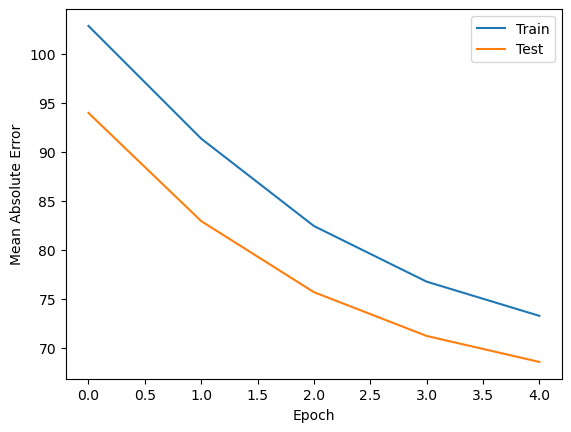

In [10]:
import matplotlib.pyplot as plt

#Plotting
plt.plot(hist.history['mean_absolute_error'], label='Train')
plt.plot(hist.history['val_mean_absolute_error'], label='Test')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()